In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mail-prediction-using-machine-learning/mail_data.csv


# **Spam Mail Prediction using Machine Learning [Python]**

# **1. Introduction**

The purpose of this project is to build a spam detection model using machine learning techniques. The dataset contains email messages labeled as either spam or ham (not spam). The model aims to classify emails as spam or ham based on their textual content.

# **2. Data Description**

This dataset consists of email messages and their corresponding labels. The dataset is structured as follows:

1. **Category:** Indicates whether the email is spam (0) or ham (1).

2. **Message:** The actual content of the email.

The dataset is sourced from real-world email communications and includes both normal (ham) emails and spam emails. The spam emails generally contain promotional content, advertisements, and phishing attempts, while ham emails contain regular conversations.

# **3. Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **4. Loading and Cleaning the Data**

In [3]:
# Loading the data
mail_data=pd.read_csv('/kaggle/input/spam-mail-prediction-using-machine-learning/mail_data.csv')
mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Replace the null values with the null strings
mail_data= mail_data.where(pd.notnull(mail_data),'')
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Checking no. of. rows and columns
mail_data.shape

(5572, 2)

# **5. Data Preprocessing**

1. Handling Missing Values:** Any missing values in the dataset are replaced with an empty string.

2. **Encoding Labels:** The categorical labels ('spam' and 'ham') are converted into numerical values (0 for spam, 1 for ham).

3. **Splitting Data:** The dataset is split into training (80%) and testing (20%) subsets.

4. **Feature Extraction:** The text data is transformed into numerical vectors using the TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer.

In [6]:
# Encoding the label into numerical values (Spam mail as 0 and Ham mail as 1)
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

# **6. Data Visualization**

To better understand the dataset, the following visualizations were created:

1. **Class Distribution:** A bar chart showing the number of spam and ham emails. This helps visualize the dataset balance and confirms if the data is skewed towards one category.

2. **Word Cloud for Spam Emails:** A word cloud visualizing the most common words in spam messages. This highlights frequent spam-related keywords such as "free," "win," and "urgent."

3. **Word Cloud for Ham Emails:** A word cloud visualizing the most common words in ham messages. This helps identify commonly used words in normal email conversations.

These visualizations provide insights into the dataset and can assist in improving the feature selection process.

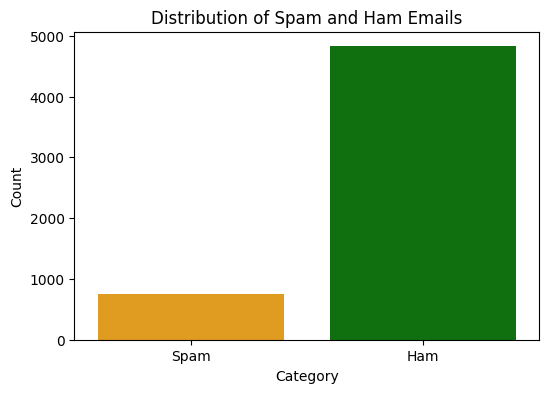

In [7]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=mail_data['Category'], palette=['orange', 'green'])
plt.xticks(ticks=[0, 1], labels=['Spam', 'Ham'])
plt.title("Distribution of Spam and Ham Emails")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

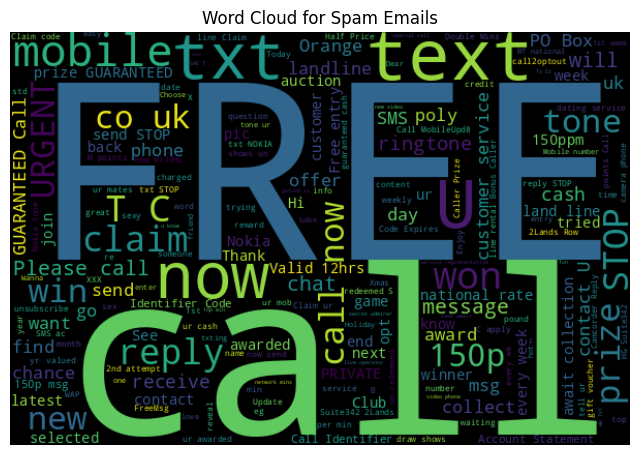

In [8]:
# Generate Word Cloud for Spam
spam_words = ' '.join(mail_data[mail_data['Category'] == 0]['Message'])
spam_wordcloud = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(8, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Spam Emails")
plt.show()

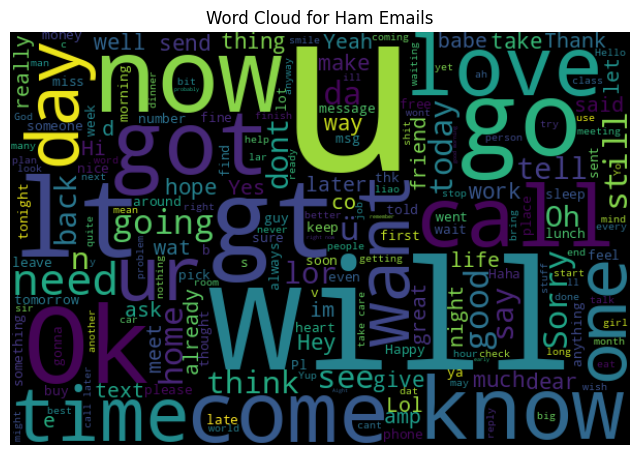

In [9]:
# Generate Word Cloud for Ham
ham_words = ' '.join(mail_data[mail_data['Category'] == 1]['Message'])
ham_wordcloud = WordCloud(width=600, height=400, background_color='black').generate(ham_words)
plt.figure(figsize=(8, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Ham Emails")
plt.show()

In [10]:
# Separating the data as texts and label
X= mail_data['Message']
y= mail_data['Category']
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# **7. Splitting Data into Training and Testing Data**

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, random_state= 3)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [13]:
# Transform the text data to feature vectors that can be used as input to the logistic regression model
feature_extraction= TfidfVectorizer(min_df= 1, stop_words= 'english', lowercase= True)

In [14]:
X_train_features= feature_extraction.fit_transform(X_train)
X_test_features= feature_extraction.transform(X_test)

# Convert y_train and y_test values as integer
y_train= y_train.astype('int')
y_test= y_test.astype('int')
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [15]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

# **8. Model Selection**

A Logistic Regression model is chosen for classification due to its effectiveness in binary classification problems.

# **9. Training the Model**

1. The model is trained using the transformed training data.

2. The model learns the relationship between the text features and their corresponding labels.

In [16]:
model= LogisticRegression()

# Traing the logistic regression model with the training data
model.fit(X_train_features, y_train)

LogisticRegression()

# **10. Model Evaluation**

The model is evaluated using accuracy as the performance metric. The accuracy scores for both training and testing datasets are calculated.

**Results:**

1. **Training Accuracy:**  X% (Replace with actual value)

2. **Testing Accuracy:**  Y% (Replace with actual value)

In [17]:
# Prediction on training data
prediction_on_training_data= model.predict(X_train_features)
accuracy= accuracy_score(y_train, prediction_on_training_data)
print('Accuracy on Training data= ', accuracy)

Accuracy on Training data=  0.9670181736594121


In [18]:
# Prediction on test data
prediction_on_test_data= model.predict(X_test_features)
accuracy_test= accuracy_score(y_test, prediction_on_test_data)
print('Accuracy on Testing data= ', accuracy_test)

Accuracy on Testing data=  0.9659192825112107


# **11. Prediction on New Data**

To test the model, two sample email messages were given as input:

1. "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."

* **Prediction:** Ham Mail

2. "URGENT! You have won a 1-week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"

* **Prediction: Spam Mail**

In [19]:
# Define input mails
input_mail1 = ["I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."]
input_mail2 = ["URGENT! You have won a 1-week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]

# Convert input texts to feature vectors
input_data1 = feature_extraction.transform(input_mail1)
input_data2 = feature_extraction.transform(input_mail2)

# Making predictions
prediction1 = model.predict(input_data1)
prediction2 = model.predict(input_data2)

# Output results
print("Prediction for input_mail1:", "Ham Mail" if prediction1[0] == 1 else "Spam Mail")
print("Prediction for input_mail2:", "Ham Mail" if prediction2[0] == 1 else "Spam Mail")

Prediction for input_mail1: Ham Mail
Prediction for input_mail2: Spam Mail


# **12. Conclusion**

The logistic regression model successfully differentiates between spam and ham emails based on their textual features. With high accuracy on both training and testing datasets, the model demonstrates strong performance. Future improvements could include:

1. Using more advanced models like **Naïve Bayes, Random Forest, or Deep Learning.**

2. Expanding the dataset with more email samples.

3. Fine-tuning hyperparameters to optimize performance.

This project showcases a practical approach to spam detection using machine learning. The model can be integrated into email filtering systems to enhance security and user experience.